# Gravitational Transform Tutorial

This tutorial over the GT package will cover

1. **Encoding a sentence into ASCII**
2. **Forward Transforming the ASCII**
3. **Visualizing the system**
4. **Recovering a sentence with the inverse transform**
5. **Orbit Snapshots**
6. **Transforming and Comparing more sentences**
7. **Diverging Orbits**


Let's start!

Imprting dependencies (transforms and visualization tools):

In [9]:
import numpy as np
from gt.pipeline_forward import forward_transform
from gt.pipeline_inverse import inverse_transform
from gt.visualization.fourier_animation import animate_fourier_orbits
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Video
from IPython.display import Image
import matplotlib as mpl
from matplotlib.animation import FFMpegWriter
from IPython.display import HTML

In [2]:
%matplotlib inline

## 1. Encoding a sentence
The transform takes a numerical signal, so if we're working with sentences, we have to transform it into ASCII data

In [3]:
def encode_text(text: str):
    return np.array([ord(c) for c in text], dtype=float)

encode_text("hello world")

array([104., 101., 108., 108., 111.,  32., 119., 111., 114., 108., 100.])

## 2. Forward Transform

We can apply the Fourier to orbit parameters map implemented in the forward_transform function. We'll get back the positions over time and some metadata needed to compute the inverse transform.

Let's apply it to a simple sentence:

In [4]:
text = "hello world"
signal = encode_text(text)

positions, meta = forward_transform(signal, steps=2000, dt=0.01)
positions.shape, meta

((2000, 12, 2), {'radius_scale': 3.0, 'gamma': 0.6, 'N': 11})

## 3. Visualizing the Gravitational Transform

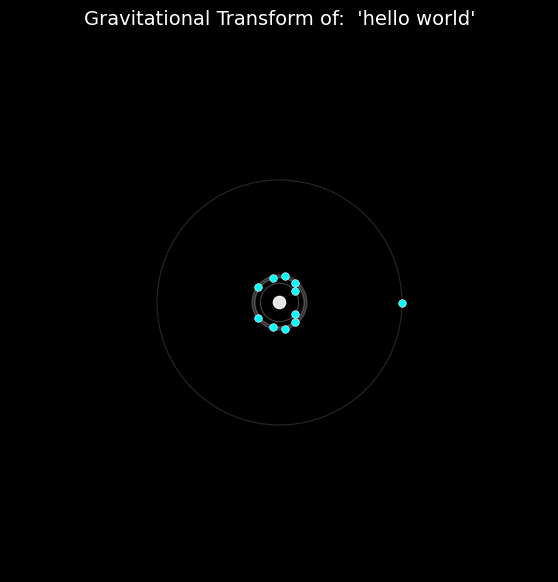

In [5]:
mpl.rcParams['animation.embed_limit'] = 15  # MB

ani = animate_fourier_orbits(
    positions,
    meta,
    message="hello world",
    interval=20
)

In [ ]:
writer = FFMpegWriter(
    fps=30,
    metadata=dict(artist='Gravitational Transform'),
    bitrate=1800
)

ani.save("hello_world.gif", writer="pillow", dpi=60)


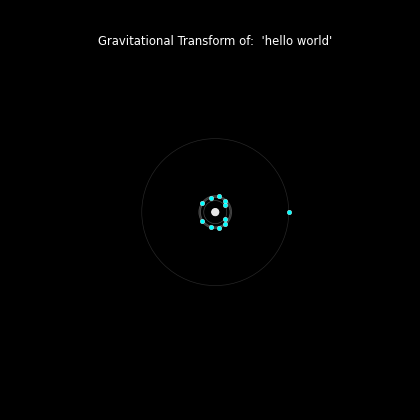

In [11]:
Image(filename="hello_world.gif", width=400)

## 4. Inverse Transform: Orbits to Fourier to Text

The inverse transform lets us decode the system at any time as it evolves

Let's decode at t=0 to see if it recovers "hello world":

In [5]:
decoded_t0 = inverse_transform(positions, meta, t_index=0)
decoded_t0

'hello world'

Now at later times:

In [6]:
decoded_t200 = inverse_transform(positions, meta, t_index=200)
decoded_t800 = inverse_transform(positions, meta, t_index=800)
decoded_t1500 = inverse_transform(positions, meta, t_index=1500)

decoded_t200, decoded_t800, decoded_t1500

(']aidktg`c]\\', 'FM`Ub#dS]NA', '?$#*-?.?+1?')

## 5. Plotting Orbital Snapshots

We can also look at orbital configurations at specific times

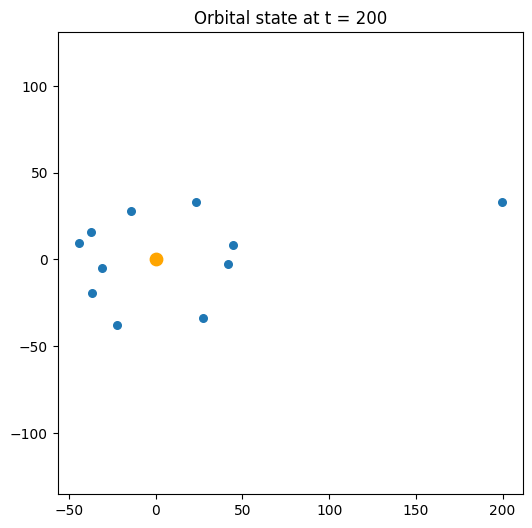

In [7]:
def plot_frame(positions, t):
    pos = positions[t]
    x = pos[:,0]
    y = pos[:,1]

    plt.figure(figsize=(6,6))
    plt.scatter(x[1:], y[1:], s=30)
    plt.scatter([0],[0], s=80, color='orange')
    plt.title(f"Orbital state at t = {t}")
    plt.axis('equal')
    plt.show()

plot_frame(positions, 200)

# 6: Comparing Some Sentences
Let's see how these orbit systems differ:

In [8]:
sentences = ["hello world", "hello worle", "goodbye world"]

for s in sentences:
    sig = encode_text(s)
    pos, meta = forward_transform(sig, steps=800)
    print(f"Sentence: {s}")
    print("Decoded at t=400:", inverse_transform(pos, meta, t_index=400))
    print()

Sentence: hello world
Decoded at t=400: jeURI?GWYfq

Sentence: hello worle
Decoded at t=400: jeURJ?GWYfo

Sentence: goodbye world
Decoded at t=400: habkk@\?PKban



# 7: Divergence
We can measure how fast orbits diverge in cases where they do:

In [10]:
def divergence(positions, t1, t2):
    pos1 = positions[t1,1:]
    pos2 = positions[t2,1:]
    return np.linalg.norm(pos1 - pos2, axis=1).mean()

for t in [10, 50, 100, 200, 400, 800]:
    print(f"Divergence(0 → {t}):", divergence(positions, 0, t))

Divergence(0 → 10): 3.569458747161663
Divergence(0 → 50): 17.681655776224172
Divergence(0 → 100): 34.34306009569859
Divergence(0 → 200): 60.9636868443927
Divergence(0 → 400): 72.4805987090826
Divergence(0 → 800): 37.512117084847006
